## hw09

In [11]:
#真实数据
import warnings
warnings.simplefilter('ignore')
# import zipline
import pandas as pd
import pytz
import datetime as dt  

In [12]:
data = pd.read_excel('data/ex09.xlsx')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mon        717 non-null    int64  
 1   Day        717 non-null    int64  
 2   Year       717 non-null    int64  
 3   gas        717 non-null    float64
 4   crude oil  717 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 28.1 KB


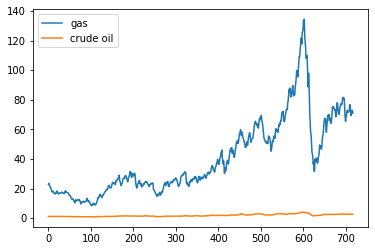

In [14]:
data[['gas', 'crude oil']].plot()

In [16]:
#收益率
data[['gas', 'crude oil']].iloc[-1] / data[['gas', 'crude oil']].iloc[0] - 1

gas          2.105240
crude oil    1.199184
dtype: float64

In [17]:
#相关系数
data[['gas', 'crude oil']].corr()

,gas,crude oil
gas,1.000000,0.977157
crude oil,0.977157,1.000000


In [21]:
import matplotlib as mpl


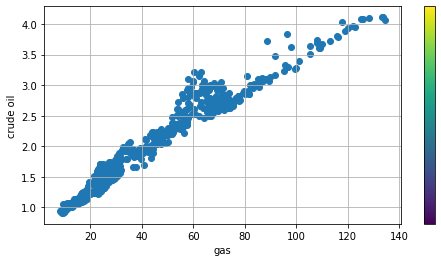

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(data['gas'], data['crude oil'], marker='o')
plt.grid(True)
plt.xlabel('gas')
plt.ylabel('crude oil')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))

logp = 293.56, ||grad|| = 45.724: 100%|██████████| 47/47 [00:00<00:00, 1867.99it/s]        
Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


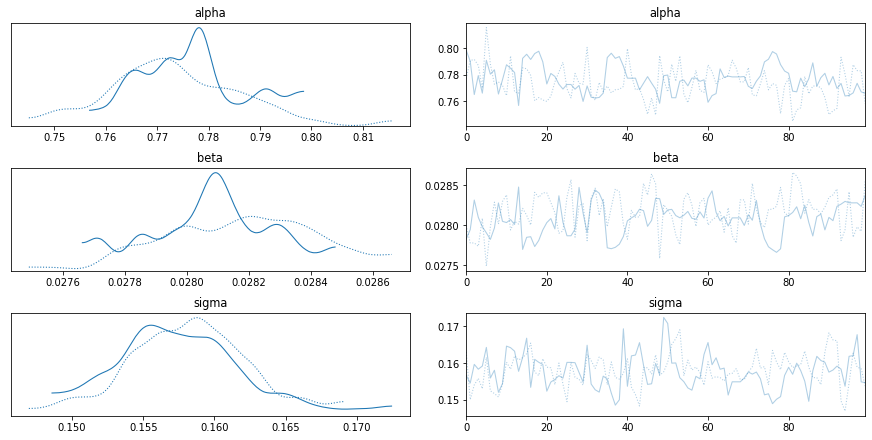

In [25]:
#贝叶斯回归             
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    y_est = alpha + beta * data['gas'].values
    
    likelihood = pm.Normal('crude oil', mu=y_est, sd=sigma,
                           observed=data['crude oil'].values)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(100, step, start=start, progressbar=False)

fig = pm.traceplot(trace)

<Figure size 576x576 with 0 Axes>

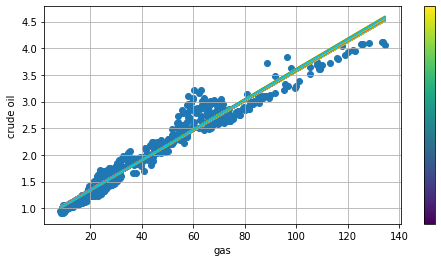

In [27]:
plt.figure(figsize=(8, 8))

plt.figure(figsize=(8, 4))
plt.scatter(data['gas'], data['crude oil'], marker='o')
plt.grid(True)
plt.xlabel('gas')
plt.ylabel('crude oil')
for i in range(len(trace)):
    plt.plot(data['gas'], trace['alpha'][i] + trace['beta'][i] * data['gas'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))